In [66]:
import pandas as pd
dataset = pd.read_csv("C:\\1Shreya\\Seminar\\Datasets\\Finaldataset.csv")

In [131]:
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score

In [68]:
dataset.head(10)

,Age,Gender,Diabetes,Hypertension,Cardiovascular disease,Pneumonia,Renal_failure,Obesity,Bowel,Respiratory,hepatatis,Cardiovascular_Diseases
0,72,Male,1,1,0,0,0,1,0,0,0,1
1,72,Male,0,0,0,0,0,0,0,0,0,0
2,62,Male,1,1,1,0,0,0,0,0,0,0
3,68,Male,0,0,0,0,0,0,0,0,0,0
4,60,Male,0,0,0,1,1,0,0,1,0,0
5,68,Male,0,0,0,0,0,0,0,0,0,1
6,64,Male,0,1,1,0,0,0,0,0,0,1
7,55,Male,1,1,0,0,0,1,0,0,0,1
8,53,Male,1,1,1,0,0,0,0,0,0,0
9,60,Male,1,1,1,0,0,0,0,0,0,0


In [69]:
dataset.isna().sum()

Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Cardiovascular disease     0
Pneumonia                  0
Renal_failure              0
Obesity                    0
Bowel                      0
Respiratory                0
hepatatis                  0
Cardiovascular_Diseases    0
dtype: int64

In [70]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [71]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Gender'.
dataset['Gender']= label_encoder.fit_transform(dataset['Gender'])

dataset['Gender'].unique()
#male=1,Female=0


array([1, 0])

In [72]:
dataset.head()

,Age,Gender,Diabetes,Hypertension,Cardiovascular disease,Pneumonia,Renal_failure,Obesity,Bowel,Respiratory,hepatatis,Cardiovascular_Diseases
0,72,1,1,1,0,0,0,1,0,0,0,1
1,72,1,0,0,0,0,0,0,0,0,0,0
2,62,1,1,1,1,0,0,0,0,0,0,0
3,68,1,0,0,0,0,0,0,0,0,0,0
4,60,1,0,0,0,1,1,0,0,1,0,0


In [73]:
print("# of patients in original data: " +str(len(dataset.index)))

# of patients in original data: 3498


In [74]:
dataset.drop(labels=['Bowel','hepatatis','Renal_failure'],axis=1)

,Age,Gender,Diabetes,Hypertension,Cardiovascular disease,Pneumonia,Obesity,Respiratory,Cardiovascular_Diseases
0,72,1,1,1,0,0,1,0,1
1,72,1,0,0,0,0,0,0,0
2,62,1,1,1,1,0,0,0,0
3,68,1,0,0,0,0,0,0,0
4,60,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
3493,64,0,0,1,0,0,0,0,1
3494,52,1,0,0,0,0,0,0,1
3495,63,1,0,0,0,0,0,0,0
3496,23,1,1,0,0,0,0,0,0


In [75]:
#Data collection done
#Analyzing Data
#Using seaborn as sns

<AxesSubplot:xlabel='Cardiovascular_Diseases', ylabel='count'>

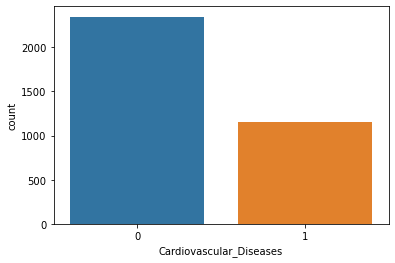

In [76]:
sns.countplot(x="Cardiovascular_Diseases", data=dataset)

<AxesSubplot:xlabel='Cardiovascular_Diseases', ylabel='count'>

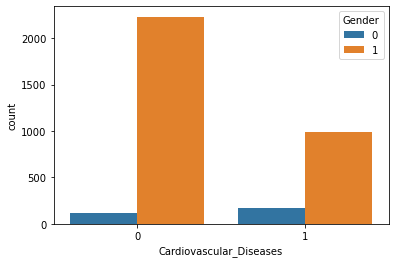

In [77]:
#How many of them were males and how many were females
sns.countplot(x="Cardiovascular_Diseases", hue="Gender", data=dataset)

In [78]:
#Where 0 stands for female and 1 stands for male

<AxesSubplot:xlabel='Cardiovascular_Diseases', ylabel='count'>

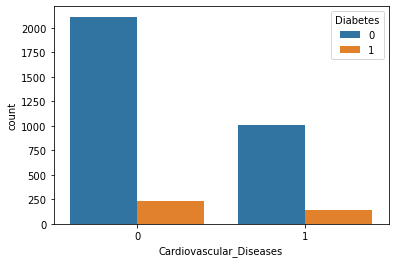

In [79]:
sns.countplot(x="Cardiovascular_Diseases", hue="Diabetes", data=dataset)

<AxesSubplot:xlabel='Cardiovascular_Diseases', ylabel='count'>

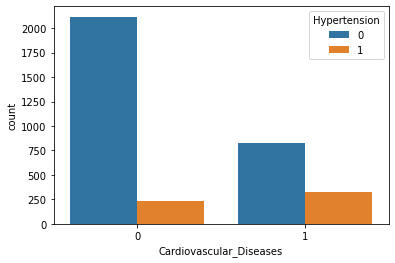

In [80]:
sns.countplot(x="Cardiovascular_Diseases", hue="Hypertension", data=dataset)

<AxesSubplot:xlabel='Cardiovascular_Diseases', ylabel='count'>

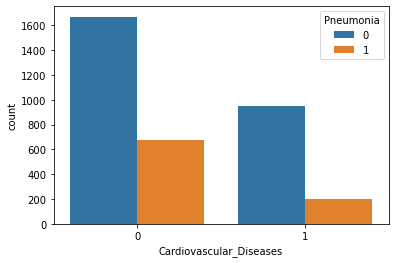

In [81]:
sns.countplot(x="Cardiovascular_Diseases", hue="Pneumonia", data=dataset)

<AxesSubplot:ylabel='Frequency'>

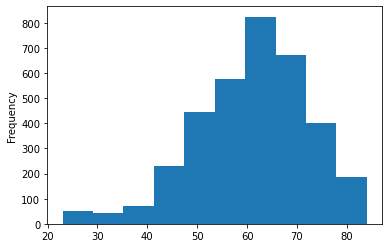

In [82]:
dataset["Age"].plot.hist()

In [83]:
#Analysis Done
#Now Data wrangling

<AxesSubplot:>

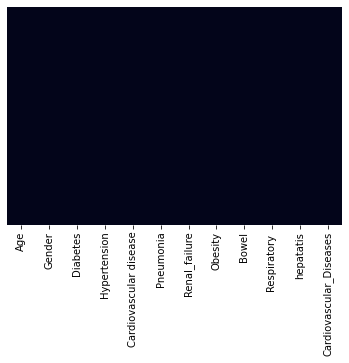

In [84]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

In [85]:
#Now training and testing dataset will be split

In [86]:
x=dataset.drop("Cardiovascular_Diseases",axis=1)
y=dataset["Cardiovascular_Diseases"]

In [87]:
print(x)

      Age  Gender  Diabetes  Hypertension  Cardiovascular disease  Pneumonia  \
0      72       1         1             1                       0          0   
1      72       1         0             0                       0          0   
2      62       1         1             1                       1          0   
3      68       1         0             0                       0          0   
4      60       1         0             0                       0          1   
...   ...     ...       ...           ...                     ...        ...   
3493   64       0         0             1                       0          0   
3494   52       1         0             0                       0          0   
3495   63       1         0             0                       0          0   
3496   23       1         1             0                       0          0   
3497   59       1         0             0                       0          1   

      Renal_failure  Obesity  Bowel  Re

In [88]:
print(y)

0       1
1       0
2       0
3       0
4       0
       ..
3493    1
3494    1
3495    0
3496    0
3497    0
Name: Cardiovascular_Diseases, Length: 3498, dtype: int64


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [91]:
x_train.shape,x_test.shape

((2448, 11), (1050, 11))

Logistic Regression

In [92]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

In [93]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)

In [94]:
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [96]:
# accuracy score on training data
x_train_prediction = logmodel.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [97]:
print('Accuracy on Training data : ',training_data_accuracy)

Accuracy on Training data :  0.7422385620915033


In [98]:
# accuracy score on test data
x_test_prediction = logmodel.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [99]:
print('Accuracy on Test data : ',test_data_accuracy)

Accuracy on Test data :  0.7476190476190476


Building a predictive system

In [110]:
input_data = (62,0,0,0,0,0,0,0,0,0,0)
#change input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logmodel.predict(input_data_reshaped)
if prediction == 1:
    print("You are at risk of having a Post Covid Cardiovascular disease")
else:
    print("You have NO risk of post covid cardiovascular disease")

You have NO risk of post covid cardiovascular disease


In [111]:
from sklearn.metrics import classification_report

In [114]:
classification_report(y_train,x_train_prediction)

'              precision    recall  f1-score   support\n\n           0       0.75      0.92      0.83      1635\n           1       0.71      0.38      0.49       813\n\n    accuracy                           0.74      2448\n   macro avg       0.73      0.65      0.66      2448\nweighted avg       0.74      0.74      0.72      2448\n'

In [120]:
from sklearn.metrics import confusion_matrix

In [115]:
confusion_matrix(y_test, x_test_prediction)

array([[664,  47],
       [218, 121]], dtype=int64)

In [121]:
# Confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [122]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [123]:
clf= LogisticRegression(max_iter=1000)
clf.fit(x_train, y_train);

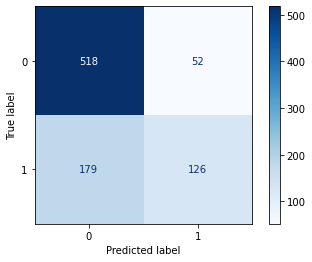

In [124]:
disp = plot_confusion_matrix(clf, x_test,y_test,cmap='Blues',values_format='.3g')

In [ ]:
#Random Forest Classifer

In [125]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

#y_pred=clf.predict(x_test)

RandomForestClassifier()

In [126]:
x_train_prediction = clf.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [127]:
print('Accuracy on Training data : ',training_data_accuracy)

Accuracy on Training data :  0.8955394586351506


In [128]:
# accuracy score on test data
x_test_prediction = clf.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [129]:
print('Accuracy on Test data : ',test_data_accuracy)

Accuracy on Test data :  0.8708571428571429


Building a Predictive system for Random forest classifier

In [130]:
input_data = (62,0,0,0,0,0,0,0,0,0,0)
#change input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
if prediction == 1:
    print("You are at risk of having a Post Covid Cardiovascular disease")
else:
    print("You have NO risk of post covid cardiovascular disease")

You are at risk of having a Post Covid Cardiovascular disease


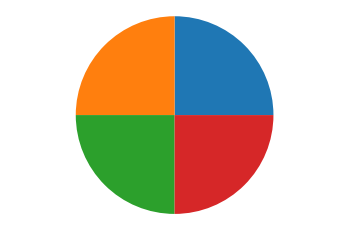

[1, 1, 1, 1]
[]


In [52]:
import matplotlib as plt
import matplotlib.pyplot as plt
input_data = (62,0,1,1,0,1,0,0,1,0,0)
#for iterating through input_data array, variable = j
input_data_new = input_data
j=0
x_labels=['Diabetes','Hypertension','Cardiovascular disease','Pneumonia','Obesity','Respiratory']
#for iterating through x_labels array, variable = k
k=0
labels=[]
#y=input_data[j]
while j in input_data_new:
    y=input_data_new[j]
    if y==1:

        labels.append(y)
        j=j+1
        k=k+1
    else:
        j=j+1
        k=k+1



sizes=[]
i=1
x=input_data[i]
for x in input_data:
    if x==1:
        sizes.append(x)
        i=i+1
    else:
        i=i+1
#colors=['red','blue','green','yellow','orange','pink','grey']
#plt.pie(sizes,colors=colors)
plt.pie(sizes)
plt.axis('equal')
plt.show()

print(sizes)
print(labels)

SVM

In [135]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
x_train_prediction = clf.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on Training data : ',training_data_accuracy)

Accuracy on Training data :  0.7316050324056423


In [136]:
# accuracy score on test data
x_test_prediction = clf.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [137]:
print('Accuracy on Test data : ',test_data_accuracy)

Accuracy on Test data :  0.7257142857142858


Building a Predictive system for SVM

In [138]:
input_data = (62,0,0,0,0,0,0,0,0,0,0)
#change input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
if prediction == 1:
    print("You are at risk of having a Post Covid Cardiovascular disease")
else:
    print("You have NO risk of post covid cardiovascular disease")

You are at risk of having a Post Covid Cardiovascular disease


KNN

In [139]:
#Import KNN
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
#y_pred = knn.predict(x_test)

KNeighborsClassifier()

In [140]:
x_train_prediction = knn.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [141]:
print('Accuracy on Training data : ',training_data_accuracy)

Accuracy on Training data :  0.8753335874952345


In [142]:
# accuracy score on test data
x_test_prediction = knn.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [143]:
print('Accuracy on Test data : ',test_data_accuracy)

Accuracy on Test data :  0.848


Building a Predictive system for KNN

In [144]:
input_data = (62,0,0,0,0,0,0,0,0,0,0)
#change input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
if prediction == 1:
    print("You are at risk of having a Post Covid Cardiovascular disease")
else:
    print("You have NO risk of post covid cardiovascular disease")

You have NO risk of post covid cardiovascular disease


Applying Cross Validation

In [145]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold

In [151]:
models = []
models.append(('KNN',KNeighborsClassifier()))
models.append(('LR',LogisticRegression()))
print(models)

[('KNN', KNeighborsClassifier()), ('LR', LogisticRegression())]


Text(0.5, 0, 'Age')

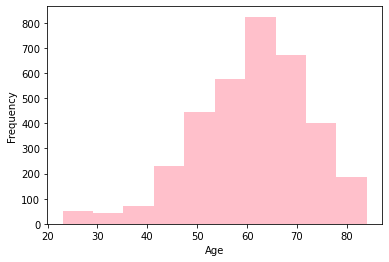

In [167]:
dataset["Age"].plot.hist(color="pink")
plt.xlabel('Age')

C:\Users\spekande\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spekande\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


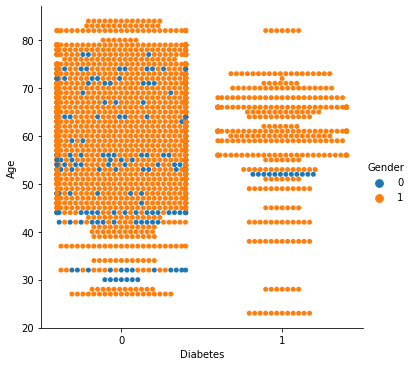

In [174]:
sns.catplot(x="Diabetes", y="Age",hue="Gender",kind="swarm",data=dataset)
#0 is no Diabetes, 1 is Diabetes

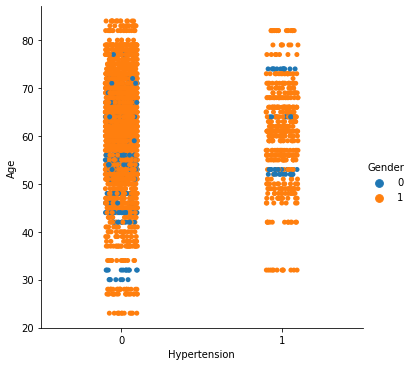

In [173]:
sns.catplot(x="Hypertension", y="Age",hue="Gender",data=dataset)

C:\Users\spekande\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spekande\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


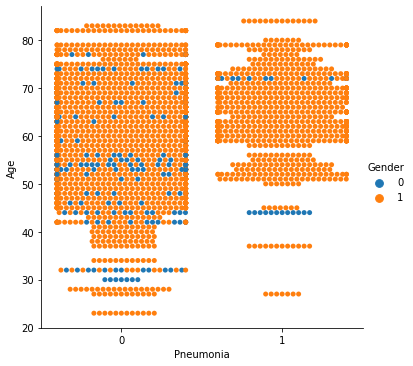

In [175]:
sns.catplot(x="Pneumonia", y="Age",hue="Gender",kind="swarm",data=dataset)
#0 is no Pneumonia, 1 is Pneumonia

C:\Users\spekande\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spekande\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


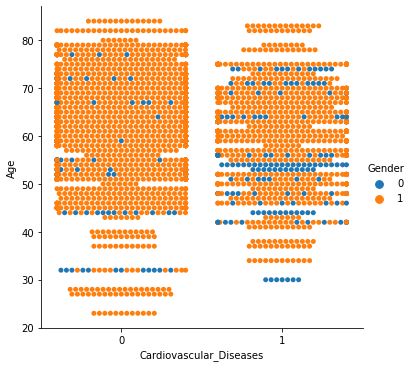

In [178]:
sns.catplot(x="Cardiovascular_Diseases", y="Age",hue="Gender",kind="swarm",data=dataset)
#0 is no Cardiovascular_Diseases, 1 is Cardiovascular_Diseases

C:\Users\spekande\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 98.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spekande\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 96.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


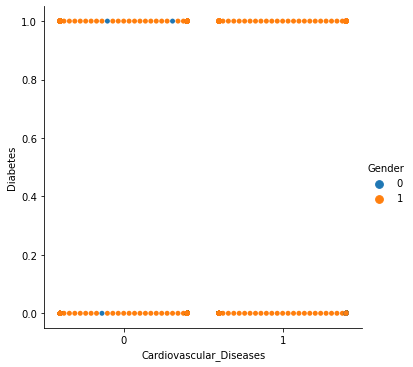

In [179]:
sns.catplot(x="Cardiovascular_Diseases", y="Diabetes",hue="Gender",kind="swarm",data=dataset)
#0 is no Cardiovascular_Diseases, 1 is Cardiovascular_Diseases

<AxesSubplot:xlabel='Cardiovascular_Diseases', ylabel='count'>

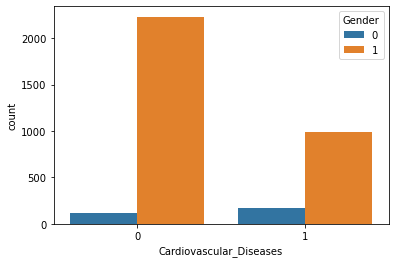

In [182]:
#How many of them were males and how many were females
sns.countplot(x="Cardiovascular_Diseases", hue="Gender", data=dataset)